**The Metro Interstate dataset:**  
The Interstate Traffic Volume Dataset contains information about the hourly traffic volume on the West-bound lane of Interstate-94 (I-94) in the US. The dataset includes hourly weather and temperature reports from 2012 to 2018.

The information in the dataset can be used to understand the flow of traffic on the interstate with respect to time and date and can be helpful in prediction of rush hours, weather forecasting as well as planning expansions of interstates and highways in the US.

Furthermore, Hourly weather features and holidays are also included for impacts on traffic volume. 

In [1]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *

#for warning 
from warnings import filterwarnings
filterwarnings("ignore")

### Reading the Dataset

In [2]:
#df_raw=pd.read_csv(r'C:\Users\nomaniqbal\Desktop\This Week\Metro_Interstate_Traffic_Volume\Metro_Interstate_Traffic_Volume.csv', parse_dates=['date_time'], index_col='date_time')
df_raw=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz", parse_dates=['date_time'], index_col='date_time')
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918
...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,None,283.45,0.0,0.0,75,Clouds,broken clouds,3543
2018-09-30 20:00:00,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2781
2018-09-30 21:00:00,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [4]:
def describe(df):
    return pd.concat([df.describe().T, df.skew().rename('skew'),], axis=1)

describe(df_raw)

,count,mean,std,min,25%,50%,75%,max,skew
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07,-2.247226
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30,219.389036
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51,48.367484
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00,-0.197257
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00,-0.089381


### Check for missing values

In [5]:
df_raw.isna().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [6]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']

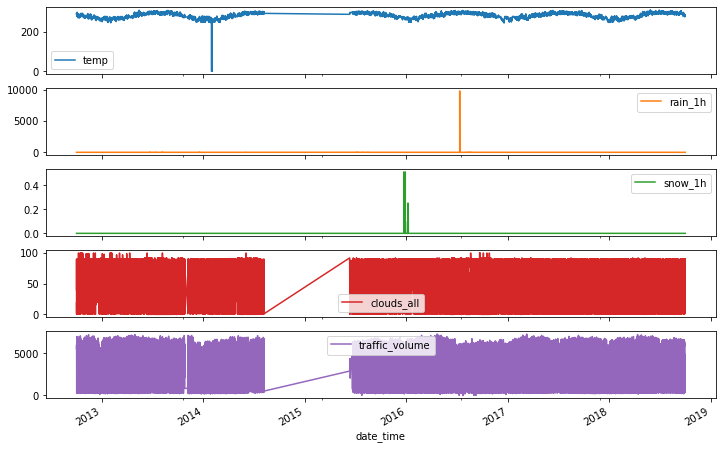

In [7]:
plot_features = df_raw[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
date_time,,,,,
2013-10-01 21:00:00,285.52,0.00,0.0,0,2670
2013-10-01 23:00:00,282.93,0.00,0.0,0,1299
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
2013-10-02 23:00:00,286.63,2.37,0.0,88,899
...,...,...,...,...,...
2013-11-30 19:00:00,274.27,0.00,0.0,64,3532
2013-11-30 20:00:00,273.16,0.00,0.0,64,2896
2013-11-30 21:00:00,272.51,0.00,0.0,64,2603


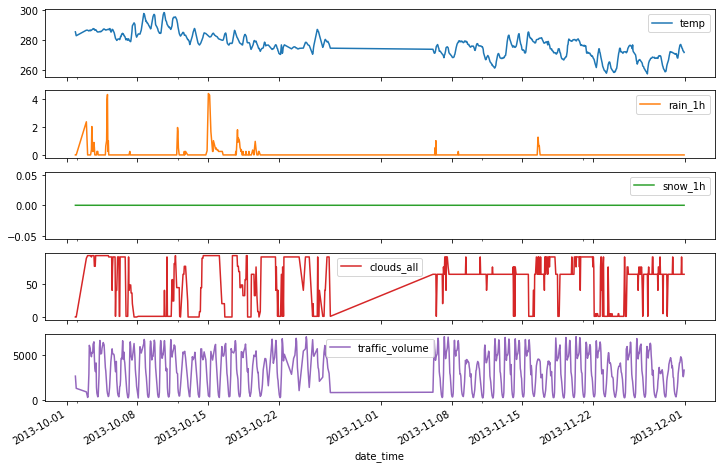

In [8]:
plot_features = df_raw[plot_cols]['2013-10':'2013-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-08-08 00:00:00,None,293.450,0.0,0.0,40,Clouds,scattered clouds,848
2014-08-08 01:00:00,None,292.380,0.0,0.0,1,Clear,sky is clear,516
2015-06-11 20:00:00,None,287.586,0.0,0.0,92,Rain,light rain,2886


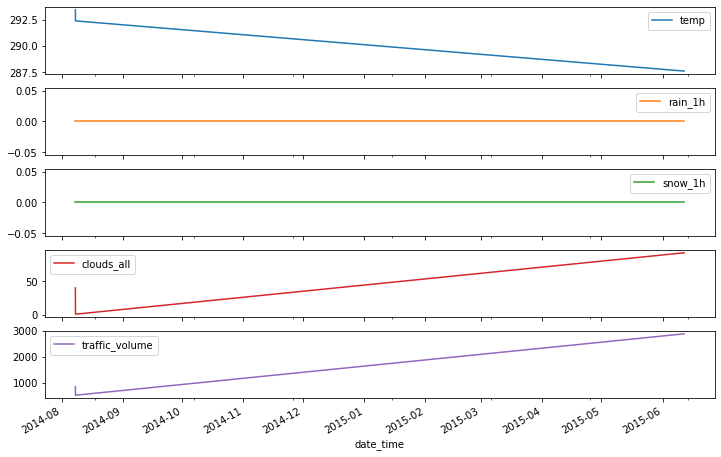

In [9]:
plot_features = df_raw['2014-08-08':'2015-06-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [10]:
df_raw.describe(datetime_is_numeric=True).transpose()

,count,mean,std,min,25%,50%,75%,max
temp,48204.0,281.205870,13.338232,0.0,272.16,282.45,291.806,310.07
rain_1h,48204.0,0.334264,44.789133,0.0,0.00,0.00,0.000,9831.30
snow_1h,48204.0,0.000222,0.008168,0.0,0.00,0.00,0.000,0.51
clouds_all,48204.0,49.362231,39.015750,0.0,1.00,64.00,90.000,100.00
traffic_volume,48204.0,3259.818355,1986.860670,0.0,1193.00,3380.00,4933.000,7280.00


In [11]:
df_raw.describe(include='object').transpose()

,count,unique,top,freq
holiday,48204,12,None,48143
weather_main,48204,11,Clouds,15164
weather_description,48204,38,sky is clear,11665


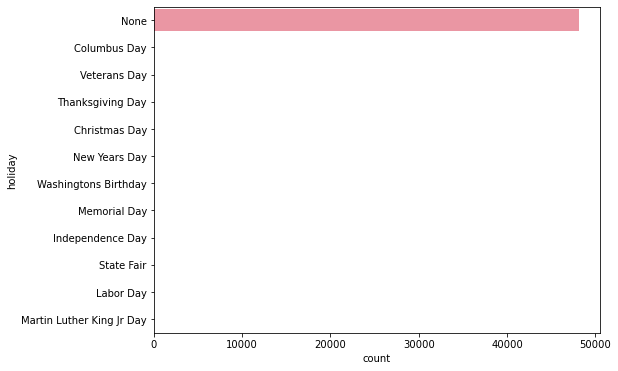

In [12]:
#Plotting frequency of each category in holiday column
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = df_raw)
plt.show()

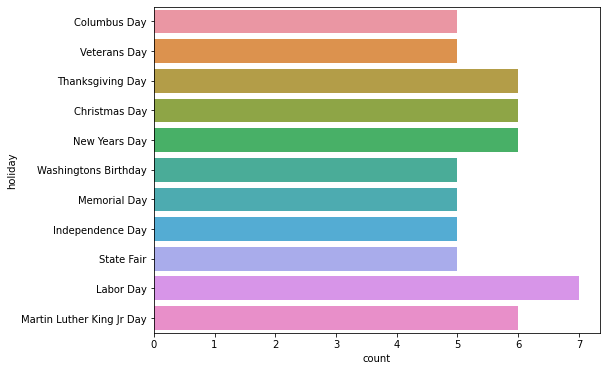

In [13]:
#'None' is far greater than the other days. Removing None data to visualize the others
holidays = df_raw.loc[df_raw.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

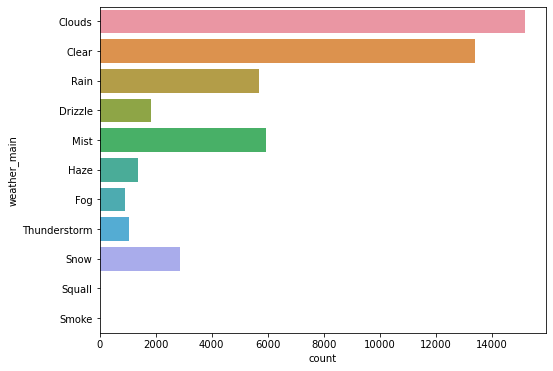

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_main', data = df_raw)
plt.show()

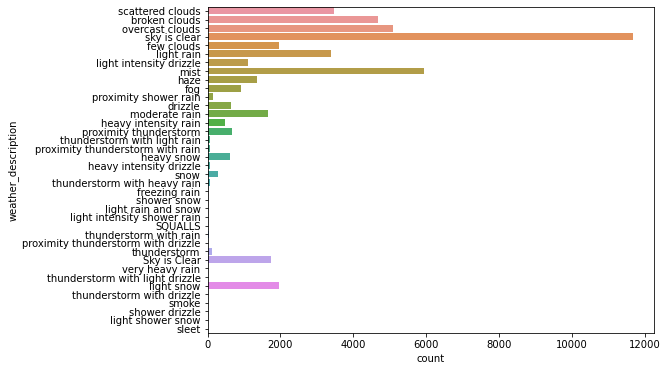

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_description', data = df_raw)
plt.show()

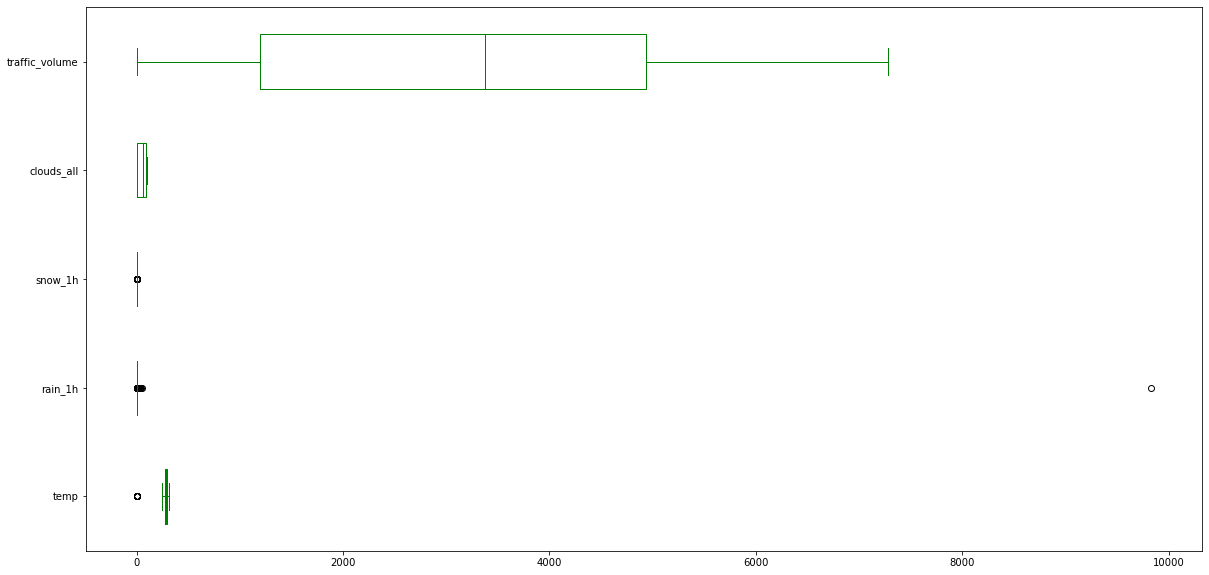

In [16]:
df_raw.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

In [17]:
df_raw[df_raw.temp == 0]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,0.0,0.0,0.0,0,Clear,sky is clear,962


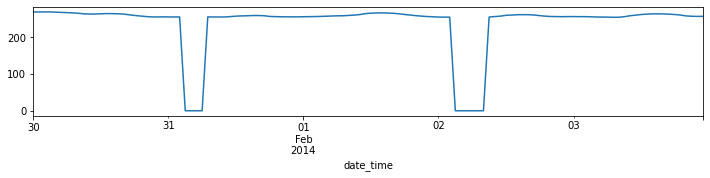

In [18]:
plot_features = df_raw['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [19]:
df_raw['2014-01-31']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,None,0.00,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,0.00,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,0.00,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,0.00,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,None,255.93,0.00,0.0,0,Clear,sky is clear,5269


In [20]:
df_raw['2014-02-02']

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 00:00:00,None,255.59,0.0,0.0,0,Clear,sky is clear,1143
2014-02-02 01:00:00,None,255.48,0.0,0.0,0,Clear,sky is clear,695
2014-02-02 02:00:00,None,255.37,0.0,0.0,0,Clear,sky is clear,539
2014-02-02 03:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,None,0.00,0.0,0.0,0,Clear,sky is clear,1670


In [21]:
day_1 = df_raw.index.date == datetime.date(2014, 1, 31)
day_2 = df_raw.index.date == datetime.date(2014, 2, 2)
bad_temps = df_raw['temp'] == 0

df_1 = df_raw.copy()
# Set the zeros to NaN to be excluded from the mean
df_1.loc[bad_temps,'temp'] = np.nan 
df_1[bad_temps]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,5150
2014-02-02 03:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,962


In [22]:
# The means to be used for each day
print(df_1[day_1].temp.mean())
print(df_1[day_2].temp.mean())

257.14000000000004
258.4327777777778


In [23]:
df_1[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,5150


In [24]:
df_1[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,None,NaN,0.0,0.0,0,Clear,sky is clear,1670


In [25]:
# Set day 1 values
df_1.loc[bad_temps & day_1, 'temp'] = df_1[day_1].temp.mean()
df_1.loc[bad_temps & day_1]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 03:00:00,None,257.14,0.0,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,257.14,0.0,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,257.14,0.0,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,257.14,0.0,0.0,0,Clear,sky is clear,5150


In [26]:
# Set day 2 values
df_1.loc[bad_temps & day_2, 'temp'] = df_1[day_2].temp.mean()
df_1.loc[bad_temps & day_2]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-02-02 03:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,291
2014-02-02 04:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,284
2014-02-02 05:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,434
2014-02-02 06:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,739
2014-02-02 07:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,962
2014-02-02 08:00:00,None,258.432778,0.0,0.0,0,Clear,sky is clear,1670


In [27]:
df_1.loc[day_1 | day_2] # Check both days after assigning the mean

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2014-01-31 00:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,644
2014-01-31 01:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,390
2014-01-31 02:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,313
2014-01-31 03:00:00,None,257.140000,0.00,0.0,0,Clear,sky is clear,361
2014-01-31 04:00:00,None,257.140000,0.00,0.0,0,Clear,sky is clear,734
2014-01-31 05:00:00,None,257.140000,0.00,0.0,0,Clear,sky is clear,2557
2014-01-31 06:00:00,None,257.140000,0.00,0.0,0,Clear,sky is clear,5150
2014-01-31 07:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,5363
2014-01-31 08:00:00,None,255.930000,0.00,0.0,0,Clear,sky is clear,5269


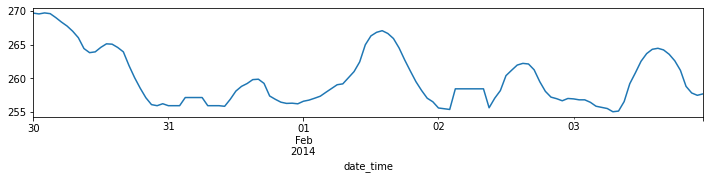

In [28]:
plot_features = df_1['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [29]:
df_1[df_1.rain_1h > 100]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2016-07-11 17:00:00,None,302.11,9831.3,0.0,75,Rain,very heavy rain,5535


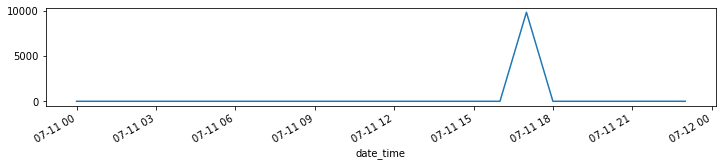

In [30]:
plot_features = df_1['2016-07-11'].rain_1h
_ = plot_features.plot(figsize=(12,2))

In [31]:
df_2 = df_1.copy()
df_2.loc['2016-07-11 17:00:00','rain_1h'] = np.nan
df_2.loc['2016-07-11 17:00:00','rain_1h'] = df_2.rain_1h.mean()

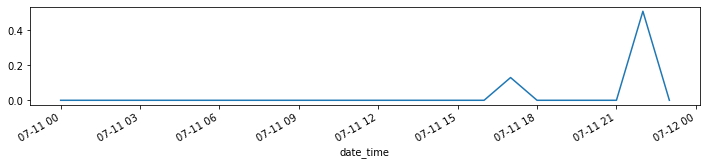

In [32]:
plot_features = df_2['2016-07-11'].rain_1h
_ = plot_features.plot(figsize=(12,2))

In [33]:
df_2[(df_2.snow_1h > .2)]

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
date_time,,,,,,,,
2015-12-23 12:00:00,None,274.33,0.98,0.51,90,Rain,moderate rain,5167
2015-12-23 12:00:00,None,274.33,0.98,0.51,90,Snow,snow,5167
2015-12-23 12:00:00,None,274.33,0.98,0.51,90,Mist,mist,5167
2015-12-23 12:00:00,None,274.33,0.98,0.51,90,Fog,fog,5167
2015-12-23 14:00:00,None,273.74,0.00,0.32,90,Snow,light snow,5182
2015-12-23 14:00:00,None,273.74,0.00,0.32,90,Mist,mist,5182
2015-12-23 14:00:00,None,273.74,0.00,0.32,90,Rain,moderate rain,5182
2015-12-23 16:00:00,None,273.86,0.00,0.32,90,Snow,light snow,5222
2015-12-23 16:00:00,None,273.86,0.00,0.32,90,Mist,mist,5222


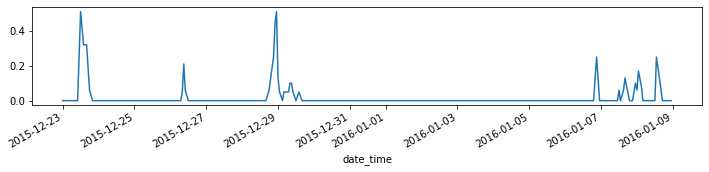

In [34]:
plot_features = df_2['2015-12-23':'2016-01-08'].snow_1h
_ = plot_features.plot(figsize=(12,2))

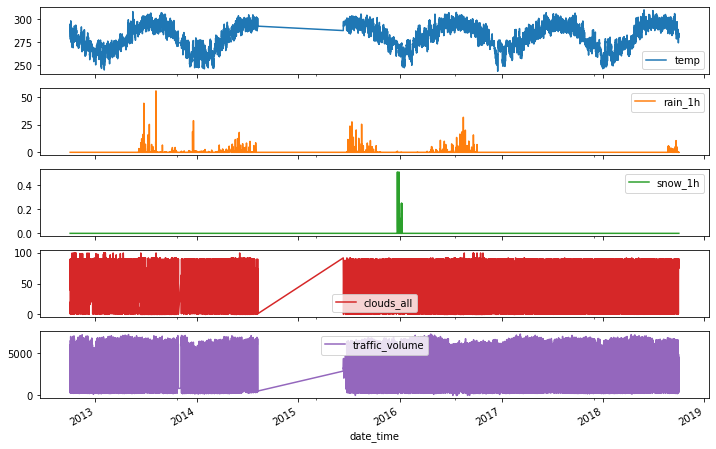

In [35]:
plot_features = df_2[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

transforming the weather info into one-hot encoded variables, and drop the description as it adds kind of redundant information with weather_main.

In [36]:
df_3 = df_2.copy()
df_3.drop(columns=['weather_description'], inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         48204 non-null  object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 3.9+ MB


In [37]:
df_3 = pd.get_dummies(df_3, columns=['weather_main'], prefix='weather')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               48204 non-null  object 
 1   temp                  48204 non-null  float64
 2   rain_1h               48204 non-null  float64
 3   snow_1h               48204 non-null  float64
 4   clouds_all            48204 non-null  int64  
 5   traffic_volume        48204 non-null  int64  
 6   weather_Clear         48204 non-null  uint8  
 7   weather_Clouds        48204 non-null  uint8  
 8   weather_Drizzle       48204 non-null  uint8  
 9   weather_Fog           48204 non-null  uint8  
 10  weather_Haze          48204 non-null  uint8  
 11  weather_Mist          48204 non-null  uint8  
 12  weather_Rain          48204 non-null  uint8  
 13  weather_Smoke         48204 non-null  uint8  
 14  weather_Snow          48204 non-nul

In [38]:
df_4 = df_3.copy()
df_4['is_holiday'] = df_4.pop('holiday').apply(lambda x: 1 if x != 'None' else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  uint8  
 6   weather_Clouds        48204 non-null  uint8  
 7   weather_Drizzle       48204 non-null  uint8  
 8   weather_Fog           48204 non-null  uint8  
 9   weather_Haze          48204 non-null  uint8  
 10  weather_Mist          48204 non-null  uint8  
 11  weather_Rain          48204 non-null  uint8  
 12  weather_Smoke         48204 non-null  uint8  
 13  weather_Snow          48204 non-null  uint8  
 14  weather_Squall        48204 non-nul

In [39]:
# Check sample values that are expected NOT TO BE a holiday
df_4[df_4.is_holiday == 0].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,0,1,0,0,0,0,0,0,0,0,0,0
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,0,1,0,0,0,0,0,0,0,0,0,0


In [40]:
# Check sample values that are expected TO BE a holiday
df_4[df_4.is_holiday == 1].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,
2012-10-08,273.08,0.0,0.0,20,455,0,1,0,0,0,0,0,0,0,0,0,1
2012-11-12,288.12,0.0,0.0,87,1000,1,0,0,0,0,0,0,0,0,0,0,1
2012-11-22,278.54,0.0,0.0,20,919,0,0,0,0,0,1,0,0,0,0,0,1
2012-12-25,264.40,0.0,0.0,90,803,0,1,0,0,0,0,0,0,0,0,0,1
2013-01-01,263.49,0.0,0.0,58,1439,0,1,0,0,0,0,0,0,0,0,0,1


In [41]:
df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='date_time', length=48204)

In [42]:
df_4['is_weekend'] = df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  uint8  
 6   weather_Clouds        48204 non-null  uint8  
 7   weather_Drizzle       48204 non-null  uint8  
 8   weather_Fog           48204 non-null  uint8  
 9   weather_Haze          48204 non-null  uint8  
 10  weather_Mist          48204 non-null  uint8  
 11  weather_Rain          48204 non-null  uint8  
 12  weather_Smoke         48204 non-null  uint8  
 13  weather_Snow          48204 non-null  uint8  
 14  weather_Squall        48204 non-nul

In [43]:
# Check sample values that are expected NOT TO BE a weekend
df_4[df_4.is_weekend == 0].index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date_time', length=34501)

In [44]:
# Check sample values that are expected TO BE a weekend
df_4[df_4.is_weekend == 1].index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='date_time', length=13703)

Similarly the Date Time column is very useful, but not in this form. We converting it to seconds:

In [45]:
timestamp_s = df_4.index.map(datetime.datetime.timestamp)

assumption is that the traffic flow is seasonal and periodic based on daily and yearly periodicity.

A simple approach to convert it to a usable signal is to use sin and cos to convert the time to clear "Time of day" and "Time of year" signals:

In [46]:
day = 24*60*60
year = (365.2425)*day

df_4['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_4['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_4['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_4['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df_4

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,...,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday,is_weekend,Day sin,Day cos,Year sin,Year cos
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,0,1,0,0,0,...,0,0,0,0,0,0,0.866025,5.000000e-01,-0.999837,0.018058
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,0,1,0,0,0,...,0,0,0,0,0,0,0.965926,2.588190e-01,-0.999824,0.018775
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,0,1,0,0,0,...,0,0,0,0,0,0,1.000000,8.867710e-12,-0.999810,0.019492
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,0,1,0,0,0,...,0,0,0,0,0,0,0.965926,-2.588190e-01,-0.999796,0.020208
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,0,1,0,0,0,...,0,0,0,0,0,0,0.866025,-5.000000e-01,-0.999781,0.020925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,3543,0,1,0,0,0,...,0,0,0,0,0,1,-0.500000,-8.660254e-01,-0.999855,-0.017005
2018-09-30 20:00:00,282.76,0.0,0.0,90,2781,0,1,0,0,0,...,0,0,0,0,0,1,-0.707107,-7.071068e-01,-0.999867,-0.016288
2018-09-30 21:00:00,282.73,0.0,0.0,90,2159,0,0,0,0,0,...,0,0,0,1,0,1,-0.866025,-5.000000e-01,-0.999879,-0.015571


Text(0.5, 1.0, 'Time of day signal')

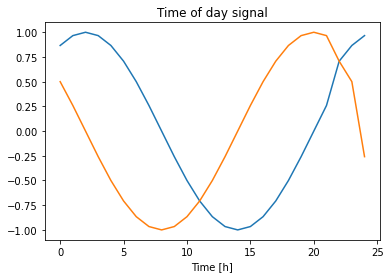

In [47]:
plt.plot(np.array(df_4['Day sin'])[:25])
plt.plot(np.array(df_4['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [49]:
df_4['dayofweek'] = df_4.index.dayofweek
df_4['day'] = df_4.index.day
df_4['month'] = df_4.index.month
df_4['year'] = df_4.index.year
df_4['day_hour'] = df_4.index.hour

In [50]:
df_5 = df_4.copy()

In [51]:
df_5.insert(0, 'traffic_volume', df_5.pop('traffic_volume'))
df_5.insert(1, 'Day sin', df_5.pop('Day sin'))
df_5.insert(2, 'Day cos', df_5.pop('Day cos'))
df_5.insert(3, 'Year sin', df_5.pop('Year sin'))
df_5.insert(4, 'Year cos', df_5.pop('Year cos'))
df_5.insert(5, 'temp', df_5.pop('temp'))
df_5.insert(6, 'clouds_all', df_5.pop('clouds_all'))
df_5.insert(7, 'rain_1h', df_5.pop('rain_1h'))
df_5.insert(8, 'snow_1h', df_5.pop('snow_1h'))
df_5.insert(9, 'is_weekend', df_5.pop('is_weekend'))
df_5.insert(10, 'is_holiday', df_5.pop('is_holiday'))

In [52]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  int64  
 11  weather_Clear         48204 non-null  uint8  
 12  weather_Clouds        48204 non-null  uint8  
 13  weather_Drizzle       48204 non-null  uint8  
 14  weather_Fog           48204 non-nul

In [53]:
df_5.to_csv('C:\\Users\\hrush\\Desktop\\This Week\\Metro_Interstate_Traffic_Volume\\metro_interstate_clean.zip',
          compression=dict(method='zip', archive_name='C:\\Users\\nomaniqbal\\Desktop\\This Week\\Metro_Interstate_Traffic_Volume\metro_interstate_clean.csv'),
          index=True)

In [54]:
df_clean = pd.read_csv(r'C:\Users\hrush\Desktop\This Week\Metro_Interstate_Traffic_Volume\metro_interstate_clean.zip', parse_dates=['date_time'], index_col='date_time')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  int64  
 11  weather_Clear         48204 non-null  int64  
 12  weather_Clouds        48204 non-null  int64  
 13  weather_Drizzle       48204 non-null  int64  
 14  weather_Fog           48204 non-nul

In [55]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48204.0,3259.818355,1986.860670,0.00,1193.000000,3.380000e+03,4933.000000,7280.00
Day sin,48204.0,-0.002708,0.706355,-1.00,-0.707107,-4.189630e-13,0.707107,1.00
Day cos,48204.0,0.015513,0.707697,-1.00,-0.707107,2.059148e-12,0.707107,1.00
Year sin,48204.0,0.012431,0.697616,-1.00,-0.665786,-6.612269e-03,0.706248,1.00
Year cos,48204.0,-0.031676,0.715678,-1.00,-0.743974,-9.226542e-02,0.706827,1.00
temp,48204.0,281.259375,12.712720,243.39,272.160000,2.824500e+02,291.806000,310.07
clouds_all,48204.0,49.362231,39.015750,0.00,1.000000,6.400000e+01,90.000000,100.00
rain_1h,48204.0,0.130315,1.003368,0.00,0.000000,0.000000e+00,0.000000,55.63
snow_1h,48204.0,0.000222,0.008168,0.00,0.000000,0.000000e+00,0.000000,0.51
is_weekend,48204.0,0.284271,0.451071,0.00,0.000000,0.000000e+00,1.000000,1.00


In [56]:
df_clean.index.duplicated().sum()

7629

In [57]:
column_indices = {name: i for i, name in enumerate(df_clean.columns)}
print('Full dataset:\t', df_clean.shape[0])
num_features = df_clean.shape[1]
print('Number of features:', num_features)

Full dataset:	 48204
Number of features: 27


In [58]:
sorted(column_indices.items(), key=lambda x: x[1])

[('traffic_volume', 0),
 ('Day sin', 1),
 ('Day cos', 2),
 ('Year sin', 3),
 ('Year cos', 4),
 ('temp', 5),
 ('clouds_all', 6),
 ('rain_1h', 7),
 ('snow_1h', 8),
 ('is_weekend', 9),
 ('is_holiday', 10),
 ('weather_Clear', 11),
 ('weather_Clouds', 12),
 ('weather_Drizzle', 13),
 ('weather_Fog', 14),
 ('weather_Haze', 15),
 ('weather_Mist', 16),
 ('weather_Rain', 17),
 ('weather_Smoke', 18),
 ('weather_Snow', 19),
 ('weather_Squall', 20),
 ('weather_Thunderstorm', 21),
 ('dayofweek', 22),
 ('day', 23),
 ('month', 24),
 ('year', 25),
 ('day_hour', 26)]

In [59]:
train_df0 = df_clean[:-15000]
print('train_df:\t', train_df0.shape[0])
val_df0 = df_clean[-15000:-5000]
print('val_df:\t\t', val_df0.shape[0])
test_df0 = df_clean[-5000:]
print('test_df:\t', test_df0.shape[0])

train_df:	 33204
val_df:		 10000
test_df:	 5000


In [60]:
train_df = df_clean[:-15000].resample('1H').mean().pad()
print('train_df:\t', train_df.shape[0])
val_df = df_clean[-15000:-5000].resample('1H').mean().pad()
print('val_df:\t\t', val_df.shape[0])
test_df = df_clean[-5000:].resample('1H').mean().pad()
print('test_df:\t', test_df.shape[0])

train_df:	 40110
val_df:		 8359
test_df:	 4083


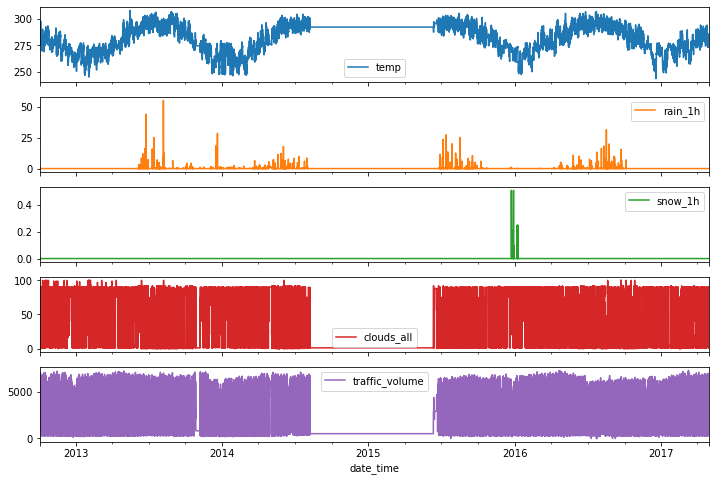

In [61]:
plot_features = train_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

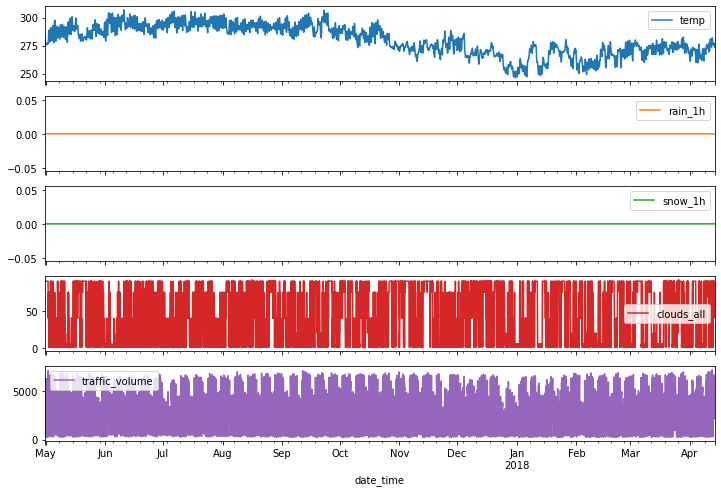

In [62]:
plot_features = val_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

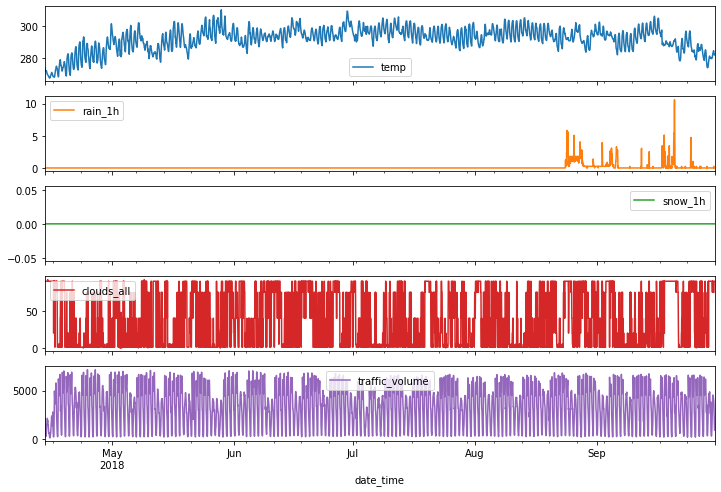

In [63]:
plot_features = test_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
my_scaler = MinMaxScaler().fit(train_df)
my_scaler_tv = MinMaxScaler().fit(train_df[['traffic_volume']])
scaled_train_df = pd.DataFrame(my_scaler.transform(train_df), index=train_df.index, columns=train_df.columns)
scaled_val_df = pd.DataFrame(my_scaler.transform(val_df), index=val_df.index, columns=val_df.columns)
scaled_test_df = pd.DataFrame(my_scaler.transform(test_df), index=test_df.index, columns=test_df.columns)

#Let's test the normalizaing and denormalizing scheme

train_df.traffic_volume[0], scaled_train_df.traffic_volume[0], np.float(my_scaler_tv.inverse_transform(scaled_train_df[['traffic_volume']])[0])

(5545.0, 0.7616758241758241, 5545.0)

In [65]:
# Single value denormalization
np.float(my_scaler_tv.inverse_transform(np.array([[.7]])))

5096.0

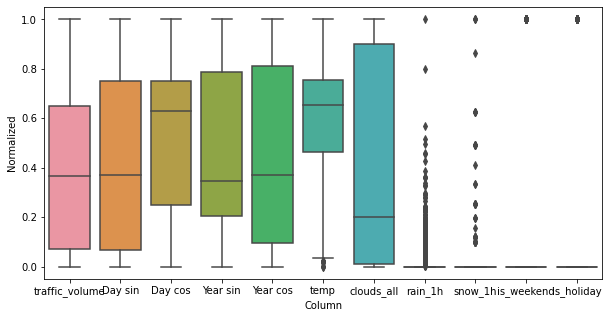

In [66]:
df_scaled = scaled_train_df.iloc[:,:11].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Column', y='Normalized', data=df_scaled)


In [67]:
# Utility functions
# Special Characters for Output Formating
StartBold = "\033[1m"
EndBold = "\033[0m"

In [68]:
'''
[Code Provided by the tutorial]
The WindowGenerator class.
Start by creating the `WindowGenerator` class. The `__init__` method includes
all the necessary logic for the input and label indices.
It also takes the train, eval, and test dataframes as input.
These will be converted to `tf.data.Dataset`s of windows later.

This class can:

1 - Handle the indexes and offsets as shown in the diagrams above.
2 - Split windows of features into a (features, labels) pairs.
3 - Plot the content of the resulting windows.
4 - Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.
'''
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, batch_size=32,
               train_df=scaled_train_df, val_df=scaled_val_df, test_df=scaled_test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.example = None

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    self.batch_size = batch_size

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size} = {self.input_width}+({self.shift-self.label_width}+{self.label_width})',
        f'Batch size: {self.batch_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices} start: [{self.label_start}]',
        f'Label column name(s): {self.label_columns}'])

  def split_window(self, features):
    '''
      Given a list consecutive inputs, the split_window method will convert
      them to a window of inputs and a window of labels.
    '''
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    '''
      The plot method that allows a simple visualization of the split window
    '''
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')
    # Maskar: Added this line show that we are only showing n slices
    plt.suptitle(f'Showing only {max_n} slices')

  def make_dataset(self, data):
    '''
      Make_dataset method will take a time series DataFrame and convert it to
      a tf.data.Dataset of (input_window, label_window) pairs using the
      preprocessing.timeseries_dataset_from_array function.
    '''
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False, # Maskar: I changed this to False
        batch_size=self.batch_size, # 32,
        )

    ds = ds.map(self.split_window)

    return ds

  # The WindowGenerator object holds training, validation and test data.
  # Add properties for accessing them as tf.data.Datasets using the above make_dataset method.
  # Also add a standard example batch for easy access and plotting:
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  @example.setter
  def example(self, var):
    self._example = var


### plotting

In [69]:
def plot_train_validation(history, validation_data, metric='mean_absolute_error'):
    '''
    Function to plot the training and validation accuracy progress with epochs for a single model
    '''
    plt.plot(history.history[metric], label='train')  # For TF2
    plt.plot(history.history['val_'+metric], label='valid.')  # For TF2
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    #plt.xticks(range(1,len(history.history['loss'])+1,2))
    #plt.ylim([0.5, 1])
    plt.title(f'{len(history.history[metric])} epochs')
    plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.show()

    # Evaluate the learned model with validation set
    print(f'\n\n{StartBold}Validation Scores:{EndBold}\n')
    _ = history.model.evaluate(validation_data, verbose=2)


In [70]:
class TrainingPlot(Callback):
    '''
      A keras callback helper function to plot
      the taining/validation plot after each epoch
    '''
    def __init__(self, loss_metric='mean_absolute_error'):
      super().__init__()
      self.loss_metric = loss_metric

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and metrics
        self.losses = []
        self.val_losses = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get(self.loss_metric)
        val_loss = logs.get('val_'+self.loss_metric)
                
        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(loss)
        self.val_losses.append(val_loss)
        
        # Plots every n-th epoch
        if epoch > 0 and epoch%1==0:
            
            # Clear the previous plot
            IPython.display.clear_output(wait=True)
            #clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # You can chose the style of your preference
            #plt.style.use("seaborn")            
            #plt.figure(figsize=(10,3))
            plt.xlabel('Epoch')
            plt.ylabel(self.loss_metric)
            plt.plot(N, self.losses, label='train')
            plt.plot(N, self.val_losses, label='valid.')
            plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
            val_denorm = np.float(my_scaler_tv.inverse_transform(np.array([[val_loss]])))
            plt.title(f'Last validation value = {val_denorm:.2f}')
            plt.legend(loc='upper right')          
            plt.show()

### Compile and fit

In [71]:
def compile_and_fit(model, window, patience=5, max_epochs=30,
                    model_label='model', log_dict=None):
    plot_metrics = TrainingPlot()

    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.001, patience=patience, mode='min', verbose=1 )

    #mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min', restore_best_weights=True )

    model.compile( optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()] )

    history = model.fit( window.train, epochs=max_epochs, validation_data=window.val, callbacks=[plot_metrics, early_stopping, rlr] )
  
    if log_dict:
        log_dict['my_models'][model_label] = model

        IPython.display.clear_output()

        print(f'\n\n{StartBold}Training vs. Validation:{EndBold}\n')
        plot_train_validation(history, window.val)

        log_dict['multi_val_performance'][model_label] = model.evaluate(window.val, verbose=0)
        log_dict['multi_performance'][model_label] = model.evaluate(window.train, verbose=0)


    predictions = model.predict(window.val)
    evaluate_predictions(val_df.traffic_volume, predictions)  
    return history

### Evaluate predictions

In [72]:
def evaluate_predictions(y_true, y_pred, plot_start_index=-500):
    print(f'\n\n{StartBold}Predictions Evaluation:{EndBold}\n')
    y_p = np.asarray(my_scaler_tv.inverse_transform(y_pred.reshape(-1,1))).ravel()
    n_predictions = len(y_p)
    y = np.asarray(y_true[-n_predictions:]).ravel()
    print('Predictions:', n_predictions)
    mae = np.float(tf.metrics.mean_absolute_error(y, y_p))
    mae_scaled = np.float(my_scaler_tv.transform(np.array([[mae]])))
    print(f'MAE: {mae:.2f} ({mae_scaled:.4f})')

    plt.subplots(figsize=(15,2))
    plt.plot(y[plot_start_index:], marker='.', label='true')
    plt.plot(y_p[plot_start_index:], marker='.', label='predicted')
    plt.legend()
    plt.show()

### The models
The required window

Total window size: 8 = 6+(1+1)
Batch size: 32
Input indices: [0 1 2 3 4 5]
Label indices: [7] start: [7]
Label column name(s): ['traffic_volume']

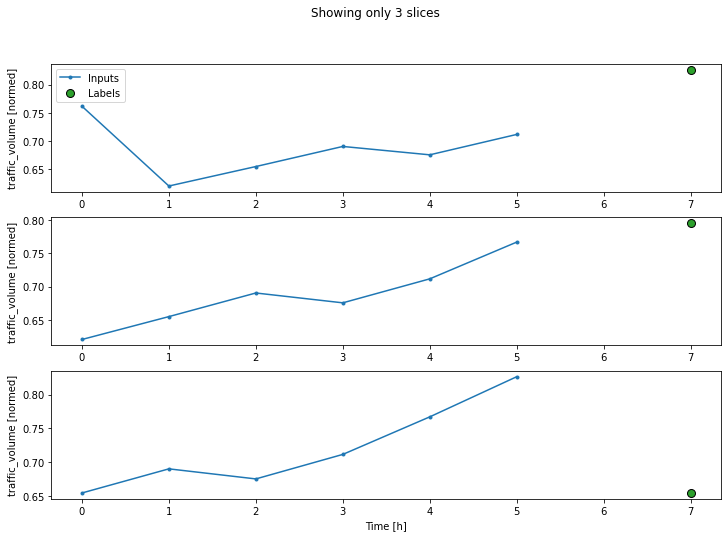

In [73]:
INPUT_WIDTH = 6
OUT_STEPS = 1
SHIFT = 2
base_window = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=32
                               )

base_window.plot()
base_window

### Baseline Models

In [74]:
multi_val_performance = {}
multi_performance = {}
my_models = {}

my_log = {
    'multi_val_performance':multi_val_performance,
    'multi_performance':multi_performance,
    'my_models':my_models
    }

I set all the models to converge into a single output value, which is the traffic volume at the 8th day based on 6 days input of the full features.

### Dense
Using only layers.Dense between the input and output gives a decent linear model.



Training vs. Validation:



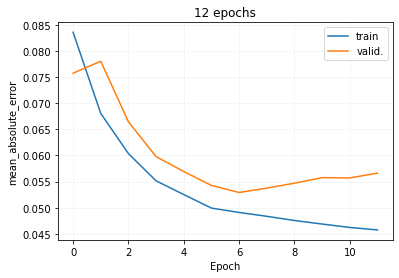



Validation Scores:

261/261 - 0s - loss: 0.0054 - mean_absolute_error: 0.0529


Predictions Evaluation:

Predictions: 8352
MAE: 385.16 (0.0529)


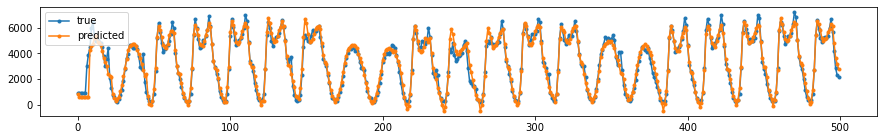

Wall time: 42.1 s


In [75]:
%%time
model_label = 'Dense'
current_window = base_window

dense_model = tf.keras.Sequential([
    Lambda(lambda x: x[:, -1:, :]),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(dense_model, current_window,
                          model_label=model_label, log_dict=my_log)

### CNN
A convolutional model makes predictions based on a fixed-width history, which may lead to better performance than the dense model since it can see how things are changing over time:



Training vs. Validation:



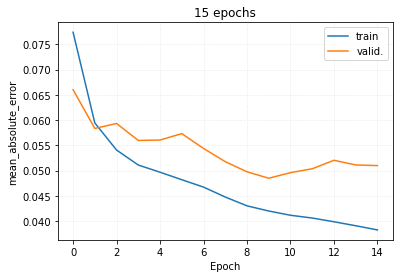



Validation Scores:

261/261 - 1s - loss: 0.0048 - mean_absolute_error: 0.0485


Predictions Evaluation:

Predictions: 8352
MAE: 352.99 (0.0485)


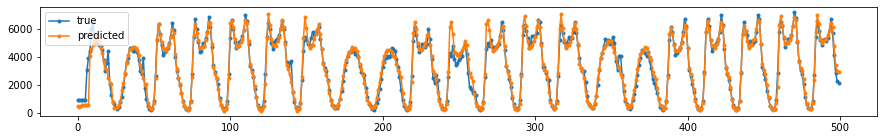

Wall time: 1min 12s


In [76]:
%%time
model_label = 'Conv'
current_window = base_window

CONV_WIDTH = 3
conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    Dense(512, activation='relu'),
    Dense(OUT_STEPS)
])

history = compile_and_fit(conv_model, current_window,
                          model_label=model_label, log_dict=my_log)



Training vs. Validation:



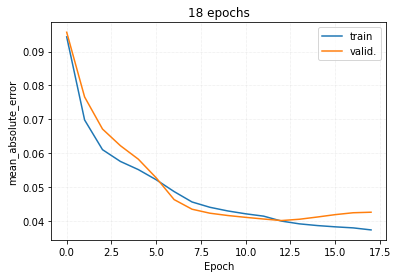



Validation Scores:

261/261 - 1s - loss: 0.0034 - mean_absolute_error: 0.0401


Predictions Evaluation:

Predictions: 8352
MAE: 291.92 (0.0401)


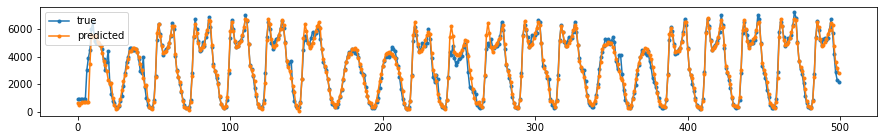

Wall time: 2min 5s


In [77]:
%%time
model_label = 'LSTM'
current_window = base_window

lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    LSTM(32, return_sequences=False),
    Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    Dense(OUT_STEPS)
])

history = compile_and_fit(lstm_model, current_window,
                          model_label=model_label, log_dict=my_log)